In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import numpy as np

# DDPM

In [9]:
jittor_ddpm_loss = pd.read_csv("./ddpm/jittor_loss_log.csv")
pytorch_ddpm_loss = pd.read_csv("./ddpm/pytorch_loss_log.csv")

In [10]:
epochs = jittor_ddpm_loss.epoch
jittor_loss = jittor_ddpm_loss.epoch_avg_loss
pytorch_loss = pytorch_ddpm_loss.epoch_avg_loss

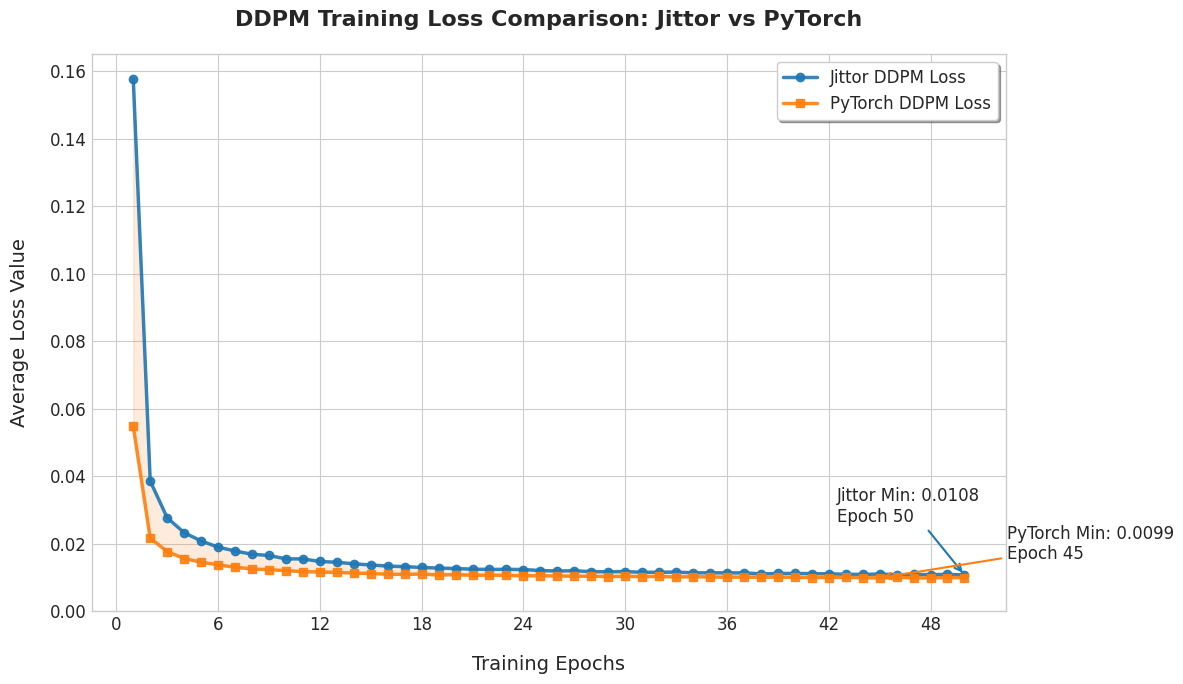

In [12]:

# 设置专业绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (12, 7),
    'figure.dpi': 100
})

# 创建画布和坐标轴
fig, ax = plt.subplots()

# 绘制两条损失曲线（添加平滑处理）
ax.plot(epochs, jittor_loss, 
        label='Jittor DDPM Loss', 
        color='#1f77b4', 
        linewidth=2.5,
        marker='o',
        markersize=6,
        alpha=0.9)

ax.plot(epochs, pytorch_loss, 
        label='PyTorch DDPM Loss', 
        color='#ff7f0e', 
        linewidth=2.5,
        marker='s',
        markersize=6,
        alpha=0.9)

# 添加专业图表元素
ax.set_title('DDPM Training Loss Comparison: Jittor vs PyTorch', pad=20)
ax.set_xlabel('Training Epochs', labelpad=15)
ax.set_ylabel('Average Loss Value', labelpad=15)
ax.legend(loc='upper right', frameon=True, shadow=True)

# 优化坐标轴显示
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # 仅显示整数刻度
ax.set_ylim(bottom=0)  # Y轴从0开始

# 添加差异填充区域（增强对比）
ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss > pytorch_loss),
                interpolate=True,
                color='#ff7f0e', 
                alpha=0.15,
                label='Jittor > PyTorch')

ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss < pytorch_loss),
                interpolate=True,
                color='#1f77b4', 
                alpha=0.15,
                label='PyTorch > Jittor')

# 添加性能对比标注
min_jittor_idx = np.argmin(jittor_loss)
min_pytorch_idx = np.argmin(pytorch_loss)

ax.annotate(f'Jittor Min: {min(jittor_loss):.4f}\nEpoch {epochs[min_jittor_idx]}',
            xy=(epochs[min_jittor_idx], min(jittor_loss)),
            xytext=(epochs[min_jittor_idx]-len(epochs)*0.15, min(jittor_loss)+max(jittor_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#1f77b4', lw=1.5))

ax.annotate(f'PyTorch Min: {min(pytorch_loss):.4f}\nEpoch {epochs[min_pytorch_idx]}',
            xy=(epochs[min_pytorch_idx], min(pytorch_loss)),
            xytext=(epochs[min_pytorch_idx]+len(epochs)*0.15, min(pytorch_loss)+max(pytorch_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#ff7f0e', lw=1.5))

# # 添加收敛分析
# final_diff = jittor_loss[-1] - pytorch_loss[-1]
# diff_text = f"Final Loss Difference: {abs(final_diff):.4f} ({'Jittor' if final_diff > 0 else 'PyTorch'} lower)"


# 保存高质量图像
plt.tight_layout()
plt.savefig('ddpm_loss_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# VAE

In [13]:
jittor_ddpm_loss = pd.read_csv("./vae/jittor_loss_log.csv")
pytorch_ddpm_loss = pd.read_csv("./vae/pytorch_loss_log.csv")

In [15]:
epochs = jittor_ddpm_loss.epoch
jittor_loss = jittor_ddpm_loss.train_loss
pytorch_loss = pytorch_ddpm_loss.train_loss

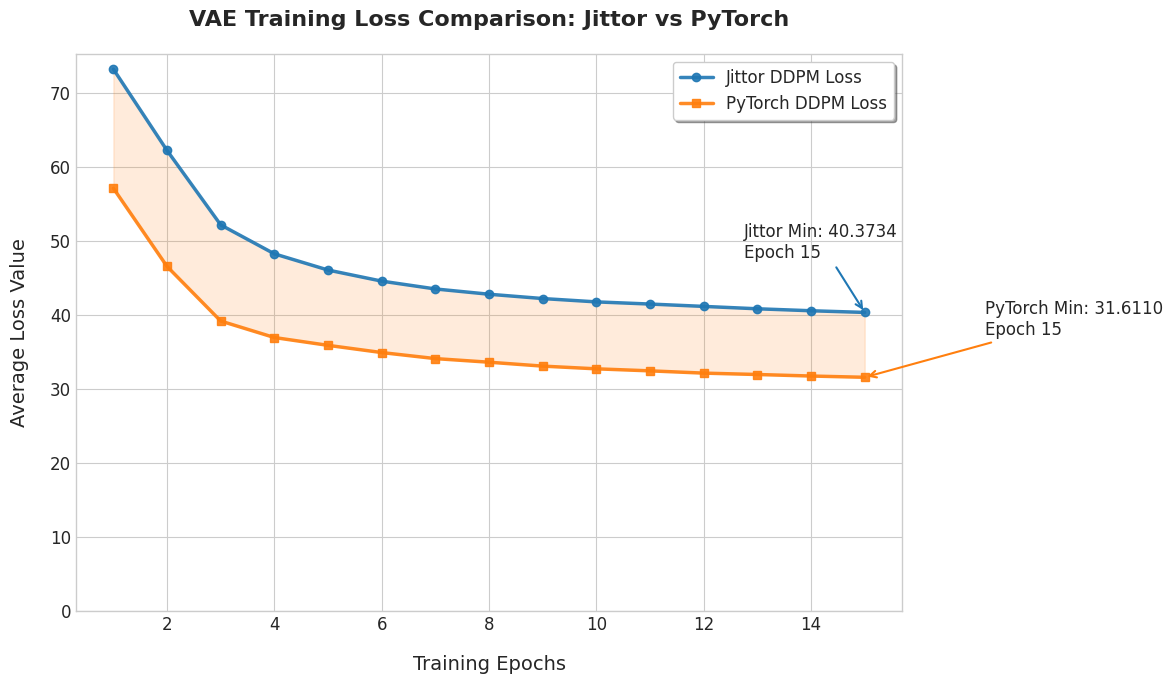

In [16]:

# 设置专业绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (12, 7),
    'figure.dpi': 100
})

# 创建画布和坐标轴
fig, ax = plt.subplots()

# 绘制两条损失曲线（添加平滑处理）
ax.plot(epochs, jittor_loss, 
        label='Jittor DDPM Loss', 
        color='#1f77b4', 
        linewidth=2.5,
        marker='o',
        markersize=6,
        alpha=0.9)

ax.plot(epochs, pytorch_loss, 
        label='PyTorch DDPM Loss', 
        color='#ff7f0e', 
        linewidth=2.5,
        marker='s',
        markersize=6,
        alpha=0.9)

# 添加专业图表元素
ax.set_title('VAE Training Loss Comparison: Jittor vs PyTorch', pad=20)
ax.set_xlabel('Training Epochs', labelpad=15)
ax.set_ylabel('Average Loss Value', labelpad=15)
ax.legend(loc='upper right', frameon=True, shadow=True)

# 优化坐标轴显示
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # 仅显示整数刻度
ax.set_ylim(bottom=0)  # Y轴从0开始

# 添加差异填充区域（增强对比）
ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss > pytorch_loss),
                interpolate=True,
                color='#ff7f0e', 
                alpha=0.15,
                label='Jittor > PyTorch')

ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss < pytorch_loss),
                interpolate=True,
                color='#1f77b4', 
                alpha=0.15,
                label='PyTorch > Jittor')

# 添加性能对比标注
min_jittor_idx = np.argmin(jittor_loss)
min_pytorch_idx = np.argmin(pytorch_loss)

ax.annotate(f'Jittor Min: {min(jittor_loss):.4f}\nEpoch {epochs[min_jittor_idx]}',
            xy=(epochs[min_jittor_idx], min(jittor_loss)),
            xytext=(epochs[min_jittor_idx]-len(epochs)*0.15, min(jittor_loss)+max(jittor_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#1f77b4', lw=1.5))

ax.annotate(f'PyTorch Min: {min(pytorch_loss):.4f}\nEpoch {epochs[min_pytorch_idx]}',
            xy=(epochs[min_pytorch_idx], min(pytorch_loss)),
            xytext=(epochs[min_pytorch_idx]+len(epochs)*0.15, min(pytorch_loss)+max(pytorch_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#ff7f0e', lw=1.5))

# # 添加收敛分析
# final_diff = jittor_loss[-1] - pytorch_loss[-1]
# diff_text = f"Final Loss Difference: {abs(final_diff):.4f} ({'Jittor' if final_diff > 0 else 'PyTorch'} lower)"


# 保存高质量图像
plt.tight_layout()
plt.savefig('ddpm_loss_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# LDM

In [17]:
jittor_ddpm_loss = pd.read_csv("./ldm/jittor_loss_log.csv")
pytorch_ddpm_loss = pd.read_csv("./ldm/pytorch_loss_log.csv")

In [18]:
epochs = jittor_ddpm_loss.epoch
jittor_loss = jittor_ddpm_loss.epoch_avg_loss
pytorch_loss = pytorch_ddpm_loss.epoch_avg_loss

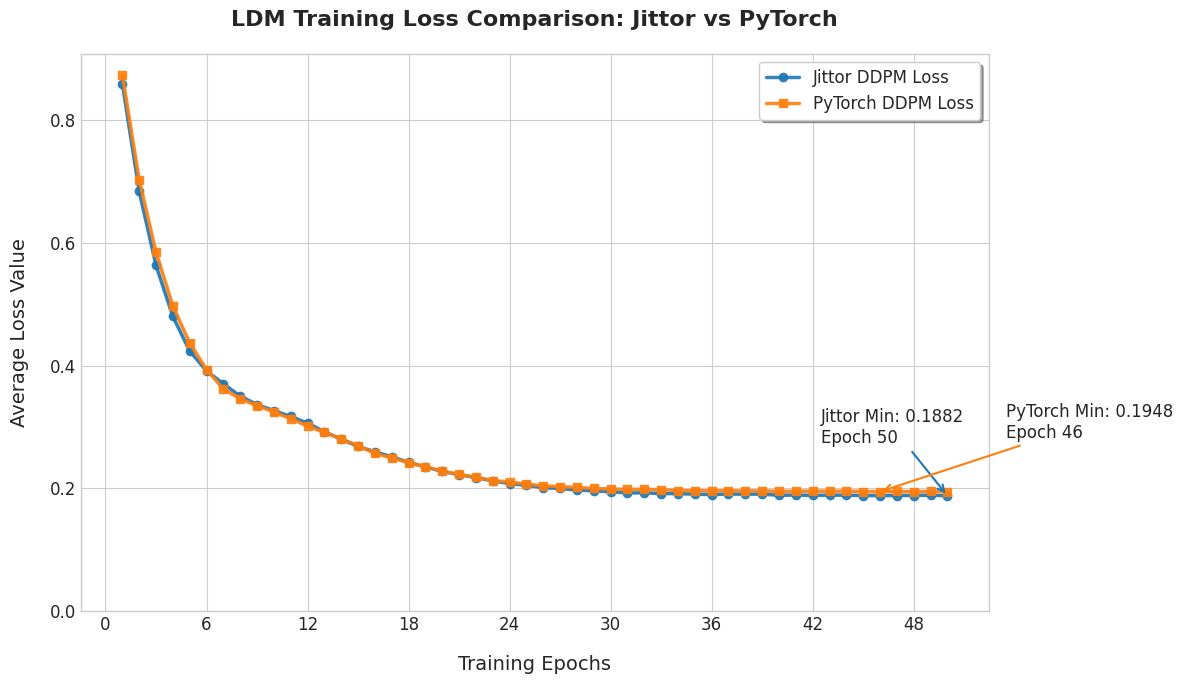

In [19]:

# 设置专业绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (12, 7),
    'figure.dpi': 100
})

# 创建画布和坐标轴
fig, ax = plt.subplots()

# 绘制两条损失曲线（添加平滑处理）
ax.plot(epochs, jittor_loss, 
        label='Jittor DDPM Loss', 
        color='#1f77b4', 
        linewidth=2.5,
        marker='o',
        markersize=6,
        alpha=0.9)

ax.plot(epochs, pytorch_loss, 
        label='PyTorch DDPM Loss', 
        color='#ff7f0e', 
        linewidth=2.5,
        marker='s',
        markersize=6,
        alpha=0.9)

# 添加专业图表元素
ax.set_title('LDM Training Loss Comparison: Jittor vs PyTorch', pad=20)
ax.set_xlabel('Training Epochs', labelpad=15)
ax.set_ylabel('Average Loss Value', labelpad=15)
ax.legend(loc='upper right', frameon=True, shadow=True)

# 优化坐标轴显示
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # 仅显示整数刻度
ax.set_ylim(bottom=0)  # Y轴从0开始

# 添加差异填充区域（增强对比）
ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss > pytorch_loss),
                interpolate=True,
                color='#ff7f0e', 
                alpha=0.15,
                label='Jittor > PyTorch')

ax.fill_between(epochs, jittor_loss, pytorch_loss, 
                where=(jittor_loss < pytorch_loss),
                interpolate=True,
                color='#1f77b4', 
                alpha=0.15,
                label='PyTorch > Jittor')

# 添加性能对比标注
min_jittor_idx = np.argmin(jittor_loss)
min_pytorch_idx = np.argmin(pytorch_loss)

ax.annotate(f'Jittor Min: {min(jittor_loss):.4f}\nEpoch {epochs[min_jittor_idx]}',
            xy=(epochs[min_jittor_idx], min(jittor_loss)),
            xytext=(epochs[min_jittor_idx]-len(epochs)*0.15, min(jittor_loss)+max(jittor_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#1f77b4', lw=1.5))

ax.annotate(f'PyTorch Min: {min(pytorch_loss):.4f}\nEpoch {epochs[min_pytorch_idx]}',
            xy=(epochs[min_pytorch_idx], min(pytorch_loss)),
            xytext=(epochs[min_pytorch_idx]+len(epochs)*0.15, min(pytorch_loss)+max(pytorch_loss)*0.1),
            arrowprops=dict(arrowstyle='->', color='#ff7f0e', lw=1.5))

# # 添加收敛分析
# final_diff = jittor_loss[-1] - pytorch_loss[-1]
# diff_text = f"Final Loss Difference: {abs(final_diff):.4f} ({'Jittor' if final_diff > 0 else 'PyTorch'} lower)"


# 保存高质量图像
plt.tight_layout()
plt.savefig('ddpm_loss_comparison.png', dpi=300, bbox_inches='tight')
plt.show()